**Problem 1 (20 points)**

Consider the probability distribution defined below. 

| $x$ | $p(x)$ |
|---|---|
| 0 | 0.25 |
| 1 | 0.10 |
| 2 | 0.20 |
| 3 | 0.40 |
| 4 | 0.05 |

(a) Generate 4000 random values ​​that follow this distribution and compare them, using a bar graph, with the theoretical results;

In [65]:
# libraries
import numpy as np
import matplotlib.pyplot as plt

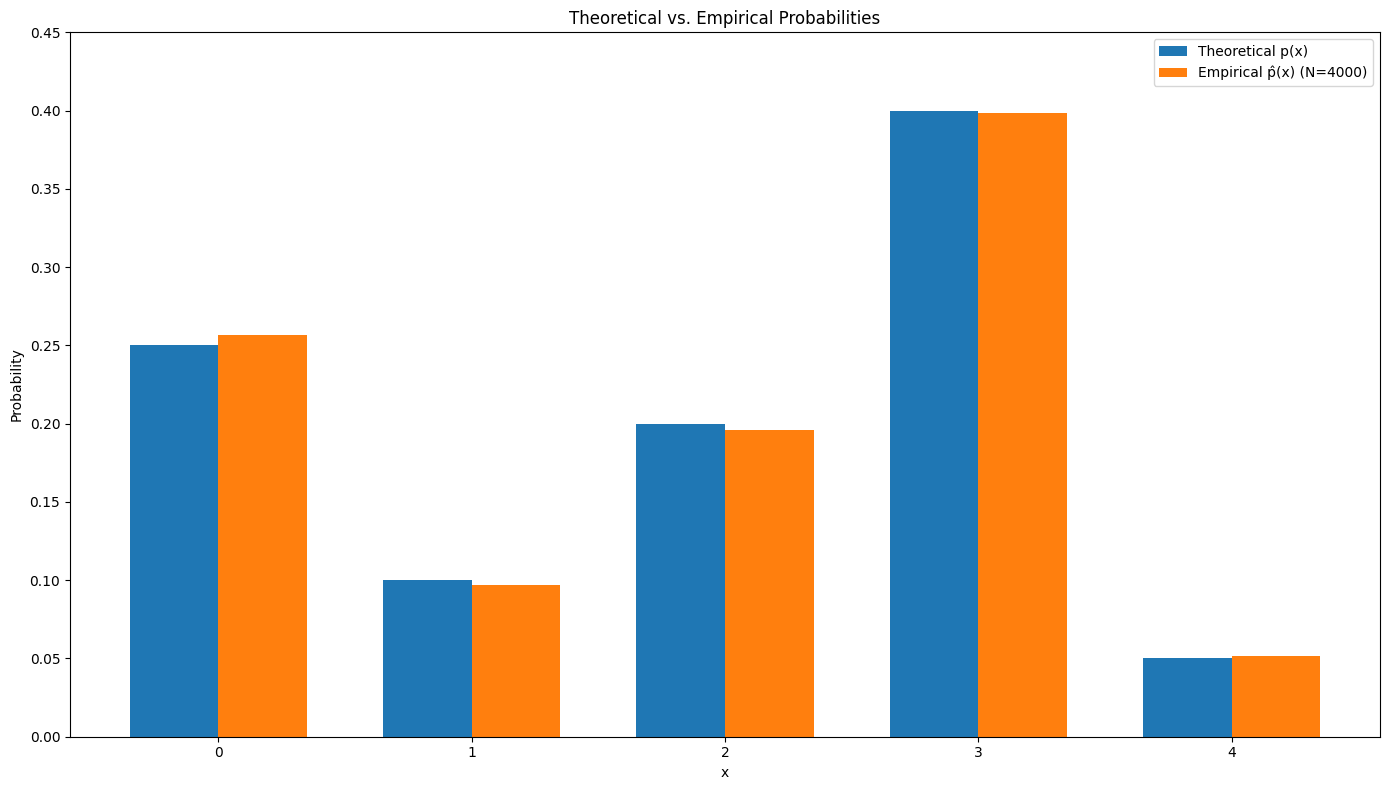

Empirical probabilities: [0.26 0.1  0.2  0.4  0.05]
Theoretical probabilities: [0.25 0.1  0.2  0.4  0.05]


In [ ]:
# Reproducibility
np.random.seed(42)

# Support values and probabilities
x_vals = np.array([0, 1, 2, 3, 4])
p_vals = np.array([0.25, 0.10, 0.20, 0.40, 0.05])

# Sample size
N = 4000

# Simulate
samples = np.random.choice(x_vals, size=N, p=p_vals)

# Empirical frequencies
counts = np.bincount(samples, minlength=len(x_vals))
empirical_p = counts / N

# Plot: side-by-side bars
width = 0.35
indices = np.arange(len(x_vals))

plt.figure(figsize=(14, 8))
plt.bar(indices - width/2, p_vals, width=0.35, label="Theoretical p(x)")
plt.bar(indices + width/2, empirical_p, width=0.35, label="Empirical p̂(x) (N=4000)")

plt.xticks(indices, x_vals)


In [ ]:
plt.ylim(0, max(p_vals.max(), empirical_p.max()) + 0.05)
plt.ylabel("Probability")
plt.xlabel("x")
plt.title("Theoretical vs. Empirical Probabilities")
plt.legend()
plt.tight_layout()
plt.show()

print("Empirical probabilities:", np.round(empirical_p, 2))
print("Theoretical probabilities:", np.round(p_vals, 4))


(b) Generate 10 experimental values ​​for $p(x)$ and, taking $x=3$ as a reference, calculate the 95% confidence interval for $p(3)$.

In [61]:
# ----------------------------
# (b) 10 experimental values for p(x) and 95% CI for p(3)
# ----------------------------
# We'll run 10 independent experiments, each with n_per_exp trials.
# Change n_per_exp if you want more/less precision per experiment.
n_experiments = 10
n_per_exp = 100  # reasonable size for variability; adjust as needed

# For each experiment, draw n_per_exp samples and compute p̂(3)
p3_hats = []
successes_total = 0
for _ in range(n_experiments):
    draws = rng.choice(x_vals, size=n_per_exp, p=probs)
    k = np.sum(draws == 3)  # "successes" = count of x=3
    p3_hats.append(k / n_per_exp)
    successes_total += k

N_total = n_experiments * n_per_exp
phat_overall = successes_total / N_total

# 95% confidence interval for a binomial proportion
# (more stable than Wald/normal for moderate N)
z = 1.96
den = 1 + (z**2) / N_total
center = (phat_overall + (z**2) / (2 * N_total)) / den
half_width = (z / den) * np.sqrt(
    (phat_overall * (1 - phat_overall) / N_total) + (z**2) / (4 * N_total**2)
)
ci_low, ci_high = center - half_width, center + half_width

# Print results
print("Ten experimental estimates of p(3):")
print(np.round(p3_hats, 4))
print(f"\nPooled estimate p̂(3) over {N_total} trials: {phat_overall:.4f}")
print(f"95% CI for p(3): [{ci_low:.4f}, {ci_high:.4f}]")
print(f"(True p(3) = {probs[x_vals == 3][0]:.2f})")

Ten experimental estimates of p(3):
[0.32 0.41 0.38 0.47 0.41 0.44 0.34 0.44 0.31 0.32]

Pooled estimate p̂(3) over 1000 trials: 0.3840
95% CI for p(3): [0.3544, 0.4145]
(True p(3) = 0.40)


**Problem 2 (30 points)**

Consider the empirically generated random values:

$$x= \{1, 3, 3, 4, 6, 7, 10, 15\}$$

(a) Assume that the above data characterize the distribution and find the distribution function $F(x)$.

(b) Find the inverse distribution function $F^{-1}(x)$.

**Problem 3 (30 points)**

Consider the random process $X(t) = 4 + 3 cos(5t+ θ)$, where θ is uniformly distributed on $[0, 2π]$.

(a) Implement the random generator for θ from a RND in [0, 1[. (It is not necessary to implement a LCG).

(b) Graphically show the autocorrelation function of $X$ for $0 ≤ τ ≤ 0.2$ (step of 0.01) and 0 $≤ τ ≤ 1.5$ (step of 0.1).

(c) Calculate the time averages considering 1000 instances of $X(t)$.

(d) Observe the variation in the time average across instances. Can the process be considered stationary in the broad sense?

xxxxxxxxxxxxxx

**Problem 4 (20 points)**

Consider Example 10, which models additive white noise in a signal. Using the same code as the example, consider the signal amplitude multiplied by a factor of 4 and by a factor of 8.

(a) Plot the resulting signal (signal plus noise), comparing the two new amplitude levels.

(b) What changes from the example? Can any conclusions be drawn about the (pure) signal and noise levels?